<a href="https://colab.research.google.com/github/hc2twv/UPSE_OP/blob/main/SimpleOmnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

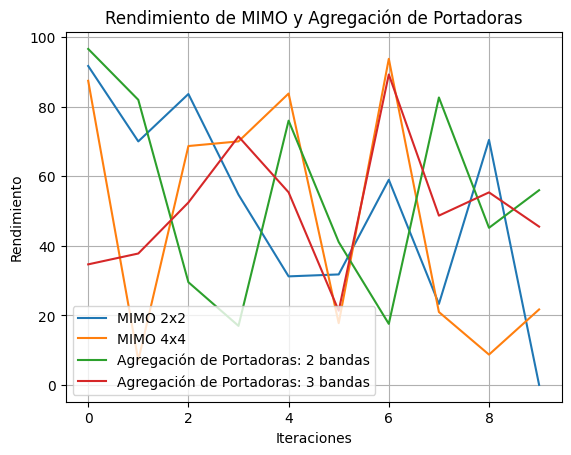

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Función para simular MIMO
def simulate_mimo(configuration):
    # Simulación del rendimiento de MIMO
    # Aquí implementarías la lógica de tu simulación MIMO
    # Por ejemplo, generación de datos aleatorios o cálculos basados en modelos

    # Supongamos que obtenemos algunos datos de rendimiento simulados
    performance_data = np.random.rand(10) * 100  # Ejemplo de datos de rendimiento (ficticios)

    return performance_data

# Función para simular Agregación de Portadoras
def simulate_carrier_aggregation(scenario):
    # Simulación del rendimiento de la Agregación de Portadoras
    # Aquí implementarías la lógica de tu simulación de Agregación de Portadoras
    # Por ejemplo, generación de datos aleatorios o cálculos basados en modelos

    # Supongamos que obtenemos algunos datos de rendimiento simulados
    performance_data = np.random.rand(10) * 100  # Ejemplo de datos de rendimiento (ficticios)

    return performance_data

# Configuraciones de MIMO y Agregación de Portadoras
mimo_configurations = ["2x2", "4x4"]
carrier_aggregation_scenarios = ["2 bandas", "3 bandas"]

# Simulación de MIMO
for config in mimo_configurations:
    performance_data = simulate_mimo(config)
    plt.plot(performance_data, label=f"MIMO {config}")

# Simulación de Agregación de Portadoras
for scenario in carrier_aggregation_scenarios:
    performance_data = simulate_carrier_aggregation(scenario)
    plt.plot(performance_data, label=f"Agregación de Portadoras: {scenario}")

# Configuración de la gráfica
plt.xlabel("Iteraciones")
plt.ylabel("Rendimiento")
plt.title("Rendimiento de MIMO y Agregación de Portadoras")
plt.legend()
plt.grid(True)
plt.show()


Explicación del Código

Generación de símbolos: Utilizamos la modulación QPSK para generar símbolos aleatorios.

Modelado del canal MIMO: Creamos una matriz de canal con distribuciones Rayleigh.

Transmisión a través del canal: Los símbolos se transmiten a través del canal MIMO y se añade ruido gaussiano al receptor.

Decodificación de los símbolos recibidos: Utilizamos la detección Zero Forcing (ZF) para estimar los símbolos transmitidos.

Cálculo de la BER: Comparamos los símbolos estimados con los símbolos transmitidos para calcular la tasa de error de bits (BER).

Visualización: Se grafica la BER en función del SNR.


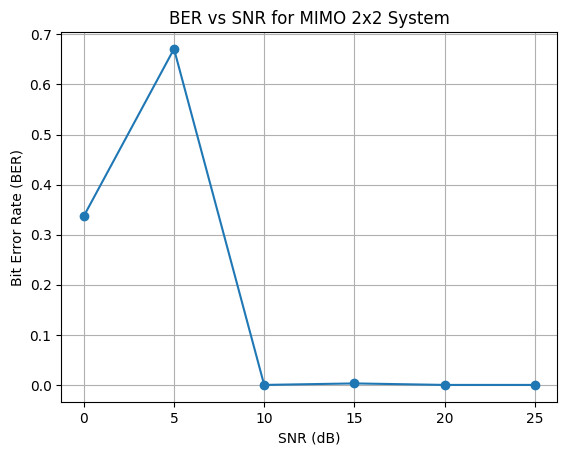

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la simulación
num_symbols = 2000  # Número de símbolos a transmitir
snr_range = range(0, 30, 5)  # Rango de relación señal-ruido (SNR) en dB
num_transmit_antennas = 3  # Número de antenas de transmisión
num_receive_antennas = 3  # Número de antenas de recepción

# Función para simular MIMO con modulación digital y modelado de canal
def simulate_mimo(num_tx, num_rx, snr):
    # Generación de símbolos de modulación digital (ejemplo: QPSK)
    symbols = np.random.choice([-1-1j, -1+1j, 1-1j, 1+1j], size=(num_tx, num_symbols))

    # Generación de matriz de canal MIMO (ejemplo: canal Rayleigh)
    h = (np.random.randn(num_rx, num_tx) + 1j * np.random.randn(num_rx, num_tx)) / np.sqrt(2)

    # Transmisión a través del canal MIMO
    noise_power = 1 / (10 ** (snr / 10))  # Potencia del ruido
    noise = (np.random.randn(num_rx, num_symbols) + 1j * np.random.randn(num_rx, num_symbols)) * np.sqrt(noise_power / 2)

    received_symbols = np.dot(h, symbols) + noise

    # Decodificación de los símbolos recibidos (detección ZF: Zero Forcing)
    h_inv = np.linalg.pinv(h)  # Pseudo-inversa de la matriz de canal
    estimated_symbols = np.dot(h_inv, received_symbols)

    # Decodificación QPSK
    estimated_symbols = np.sign(estimated_symbols.real) + 1j * np.sign(estimated_symbols.imag)

    # Cálculo de la tasa de error de bits (BER)
    ber = np.sum(symbols != estimated_symbols) / (num_tx * num_symbols)

    return ber

# Simulación de MIMO para diferentes valores de SNR
snr_results = []
for snr in snr_range:
    ber = simulate_mimo(num_transmit_antennas, num_receive_antennas, snr)
    snr_results.append(ber)

# Gráfico de la tasa de error de bits (BER) en función de la SNR
plt.plot(snr_range, snr_results, marker='o')
plt.xlabel('SNR (dB)')
plt.ylabel('Bit Error Rate (BER)')
plt.title('BER vs SNR for MIMO 2x2 System')
plt.grid(True)
plt.show()


In [5]:
import numpy as np

# Configuración de parámetros
# Ancho de banda de cada portadora (en MHz)
bandwidths = np.array([20, 15, 10])  # Por ejemplo, 20 MHz, 15 MHz, 10 MHz

# Espectro total de cada escenario
# Escenario 1: Agregación de 2 bandas
# Escenario 2: Agregación de 3 bandas
scenarios = [
    [0, 1],  # 20 MHz + 15 MHz
    [0, 1, 2]  # 20 MHz + 15 MHz + 10 MHz
]

# Función para calcular capacidad usando la fórmula de Shannon
def calculate_capacity(bandwidth_mhz, snr_db):
    snr_linear = 10 ** (snr_db / 10)
    capacity = bandwidth_mhz * 1e6 * np.log2(1 + snr_linear)  # Capacidad en bps
    return capacity

# Nivel de SNR (Signal-to-Noise Ratio) en dB
snr_db = 20  # Por ejemplo, 20 dB

# Ejecución de simulaciones
for i, scenario in enumerate(scenarios):
    total_bandwidth = np.sum(bandwidths[scenario])
    total_capacity = np.sum([calculate_capacity(bandwidths[j], snr_db) for j in scenario])
    spectral_efficiency = total_capacity / (total_bandwidth * 1e6)  # en bps/Hz

    print(f"Escenario {i+1}:")
    print(f"  Bandas agregadas: {len(scenario)}")
    print(f"  Ancho de banda total: {total_bandwidth} MHz")
    print(f"  Capacidad total: {total_capacity / 1e6:.2f} Mbps")
    print(f"  Eficiencia espectral: {spectral_efficiency:.2f} bps/Hz\n")

# Resultados
"""
Salida esperada:
Escenario 1:
  Bandas agregadas: 2
  Ancho de banda total: 35 MHz
  Capacidad total: X Mbps
  Eficiencia espectral: Y bps/Hz

Escenario 2:
  Bandas agregadas: 3
  Ancho de banda total: 45 MHz
  Capacidad total: Z Mbps
  Eficiencia espectral: W bps/Hz
"""


Escenario 1:
  Bandas agregadas: 2
  Ancho de banda total: 35 MHz
  Capacidad total: 233.04 Mbps
  Eficiencia espectral: 6.66 bps/Hz

Escenario 2:
  Bandas agregadas: 3
  Ancho de banda total: 45 MHz
  Capacidad total: 299.62 Mbps
  Eficiencia espectral: 6.66 bps/Hz



'\nSalida esperada:\nEscenario 1:\n  Bandas agregadas: 2\n  Ancho de banda total: 35 MHz\n  Capacidad total: X Mbps\n  Eficiencia espectral: Y bps/Hz\n\nEscenario 2:\n  Bandas agregadas: 3\n  Ancho de banda total: 45 MHz\n  Capacidad total: Z Mbps\n  Eficiencia espectral: W bps/Hz\n'